In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
train = pd.read_csv(r"D:\Data Science\term deposit subscription\train.csv")
test = pd.read_csv(r"D:\Data Science\term deposit subscription\test.csv")
sample = pd.read_csv(r"D:\Data Science\term deposit subscription\sample.csv")

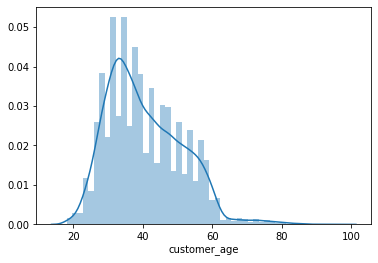

In [3]:
sns.distplot(train['customer_age'])

In [4]:
train.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [5]:
test[test.id.isin(train.id)] 

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome


# `Hypothesis Generation`

1. 'Single' customers have a higher chance of subscription.
2. Customers having tertiary education have a higher chance of subscription.
3. Defaulters have a less chance of subscribing.
4. Customers with high balance have a high chance of subscription.
5. Customers having any loan will not subcscribe.
6. Customers who are contacted at the start or end of the month are most likely to subscribe.
7. Customers with higher last contact duration are most likely to subscribe.
8. Old customers will most likely subscribe.

# EDA

### 1. Brief look at the dataset 

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,31028.0,40.439216,10.751392,18.0,32.0,39.0,48.00,97.0
balance,31248.0,1368.112615,3085.342417,-8020.0,72.0,449.0,1413.00,102128.0
day_of_month,31647.0,15.818561,8.322970,1.0,8.0,16.0,21.00,31.0
last_contact_duration,31336.0,256.184038,256.181479,0.0,103.0,179.0,315.25,4900.0
num_contacts_in_campaign,31535.0,2.776629,3.153293,1.0,1.0,2.0,3.00,63.0
days_since_prev_campaign_contact,5816.0,224.995186,114.991828,1.0,133.0,195.0,329.00,871.0
num_contacts_prev_campaign,31647.0,0.591620,2.499675,0.0,0.0,0.0,0.00,275.0
term_deposit_subscribed,31647.0,0.107246,0.309430,0.0,0.0,0.0,0.00,1.0


### 2. Shape of the dataset

In [7]:
print(f"Shape of the training set :{train.shape}")
print(f"Shape of the testing set :{test.shape}")

Shape of the training set :(31647, 18)
Shape of the testing set :(13564, 17)


### 3. Distribution of the target variable

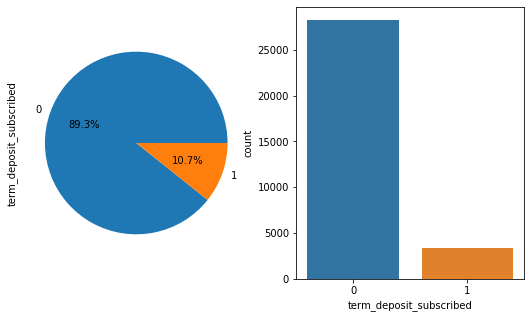

In [8]:
id_col = 'id'
target = 'term_deposit_subscribed'

features = [col for col in train.columns if col not in [target, id_col]]

f, ax = plt.subplots(1,2,figsize = (9,5))
axx = ax.flatten()

train[target].value_counts().plot.pie(autopct = "%1.1f%%", ax = axx[0])
sns.countplot(train[target], ax = axx[1])

### 4. Checking the datatypes of the variables

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
id                                  31647 non-null object
customer_age                        31028 non-null float64
job_type                            31647 non-null object
marital                             31497 non-null object
education                           31647 non-null object
default                             31647 non-null object
balance                             31248 non-null float64
housing_loan                        31647 non-null object
personal_loan                       31498 non-null object
communication_type                  31647 non-null object
day_of_month                        31647 non-null int64
month                               31647 non-null object
last_contact_duration               31336 non-null float64
num_contacts_in_campaign            31535 non-null float64
days_since_prev_campaign_contact    5816 non-null float64
num_contacts_prev_

### 5. Checking null values

In [10]:
train.isna().sum()/train.shape[0]

id                                  0.000000
customer_age                        0.019560
job_type                            0.000000
marital                             0.004740
education                           0.000000
default                             0.000000
balance                             0.012608
housing_loan                        0.000000
personal_loan                       0.004708
communication_type                  0.000000
day_of_month                        0.000000
month                               0.000000
last_contact_duration               0.009827
num_contacts_in_campaign            0.003539
days_since_prev_campaign_contact    0.816223
num_contacts_prev_campaign          0.000000
prev_campaign_outcome               0.000000
term_deposit_subscribed             0.000000
dtype: float64

### 6. Checking unique values

In [11]:
pd.concat([train.nunique(), test.nunique()], axis = 1, sort = False)

,0,1
id,31647,13564.0
customer_age,77,73.0
job_type,12,12.0
marital,3,3.0
education,4,4.0
default,2,2.0
balance,6563,4414.0
housing_loan,2,2.0
personal_loan,2,2.0
communication_type,3,3.0


In [12]:
cat_cols = ['job_type', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'communication_type', 'month', 'prev_campaign_outcome']
num_cols = [col for col in features if col not in cat_cols]

cat_cols

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

In [13]:
num_cols

['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign']

# Univariate Analysis (categorical)

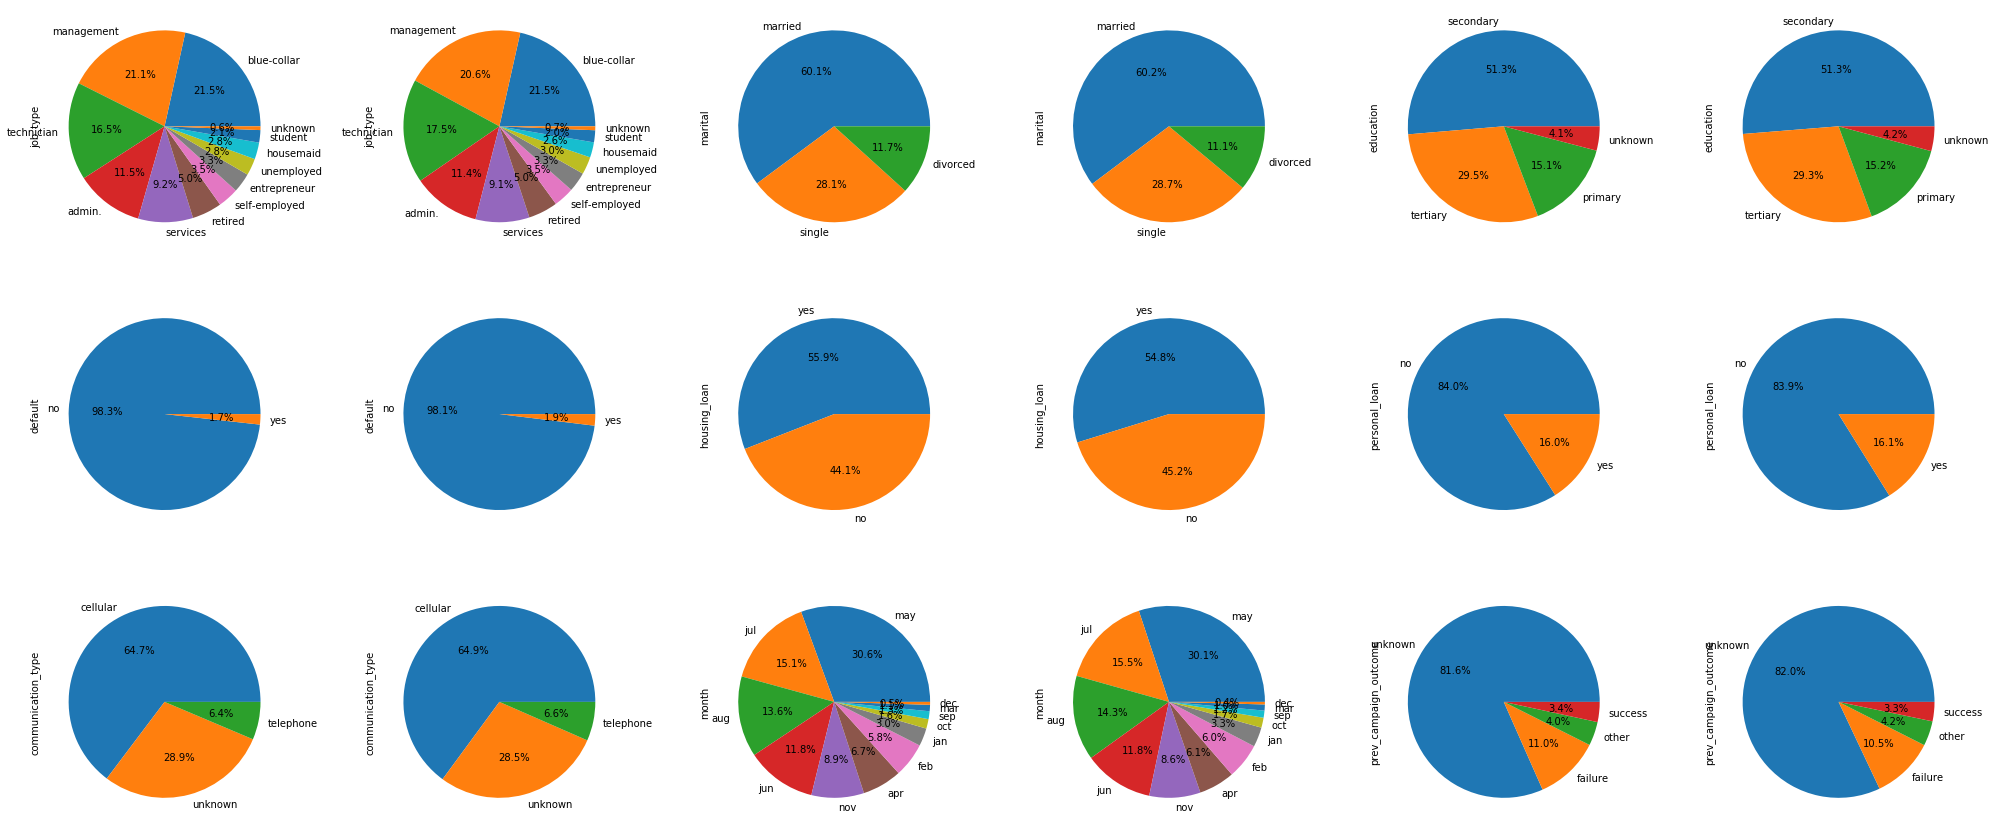

In [14]:
f, ax = plt.subplots(3,6, figsize = (35,15))
axx = ax.flatten()
index = 0

for col in cat_cols:
    train[col].value_counts().plot.pie(autopct = '%1.1f%%', ax = axx[index]) 
    index = index + 1
    test[col].value_counts().plot.pie(autopct = '%1.1f%%', ax = axx[index]) 
    index = index + 1

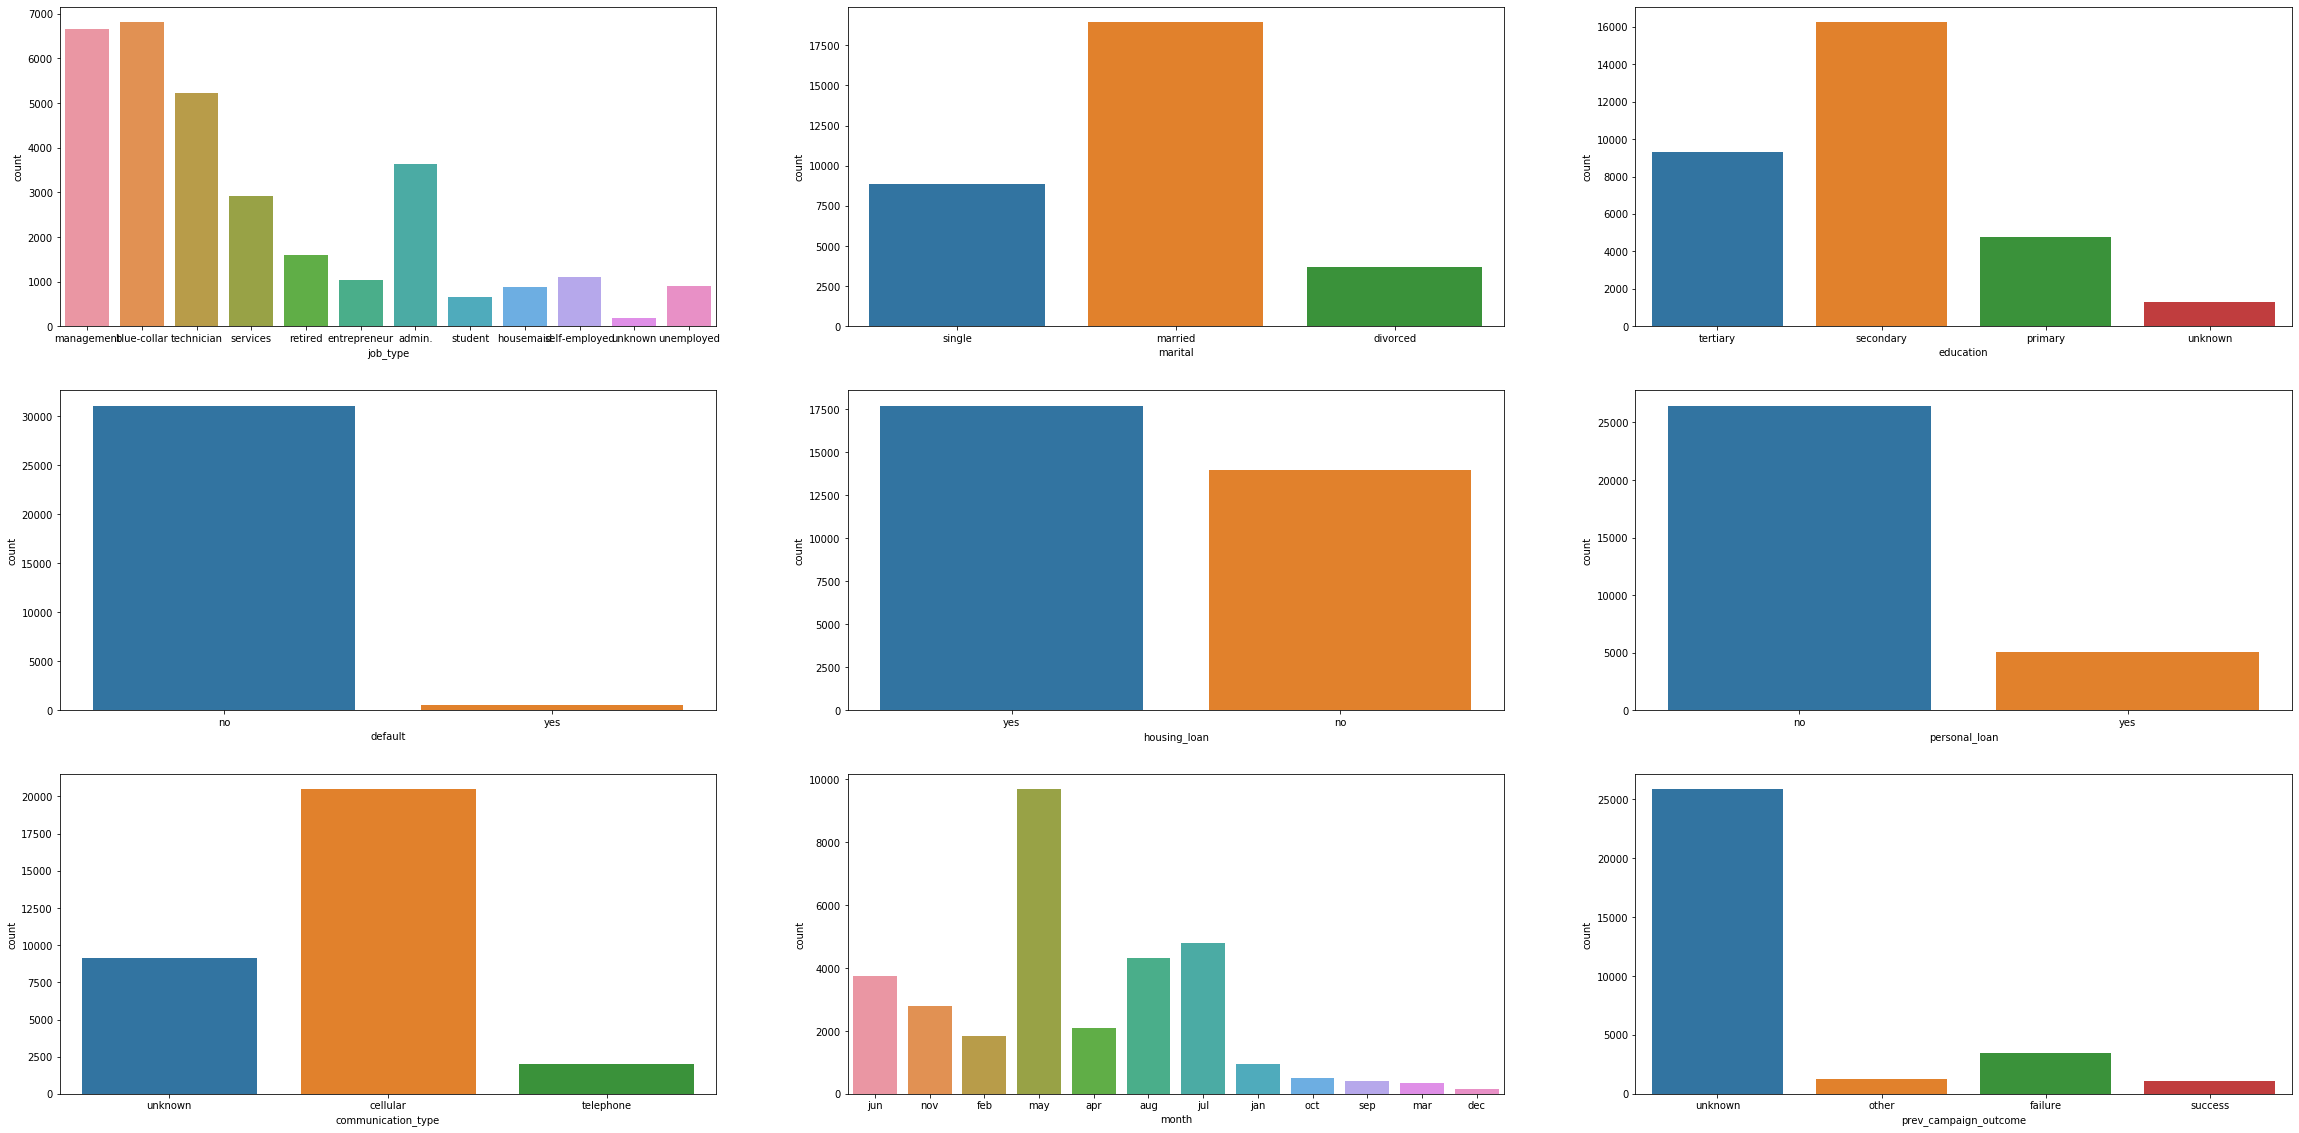

In [15]:
f, ax = plt.subplots(3,3,figsize = (40,20))
axx = ax.flatten()
                    
for index, col in enumerate(cat_cols):
    sns.countplot(train[col], ax = axx[index])

# Univariate Analysis(numerical)

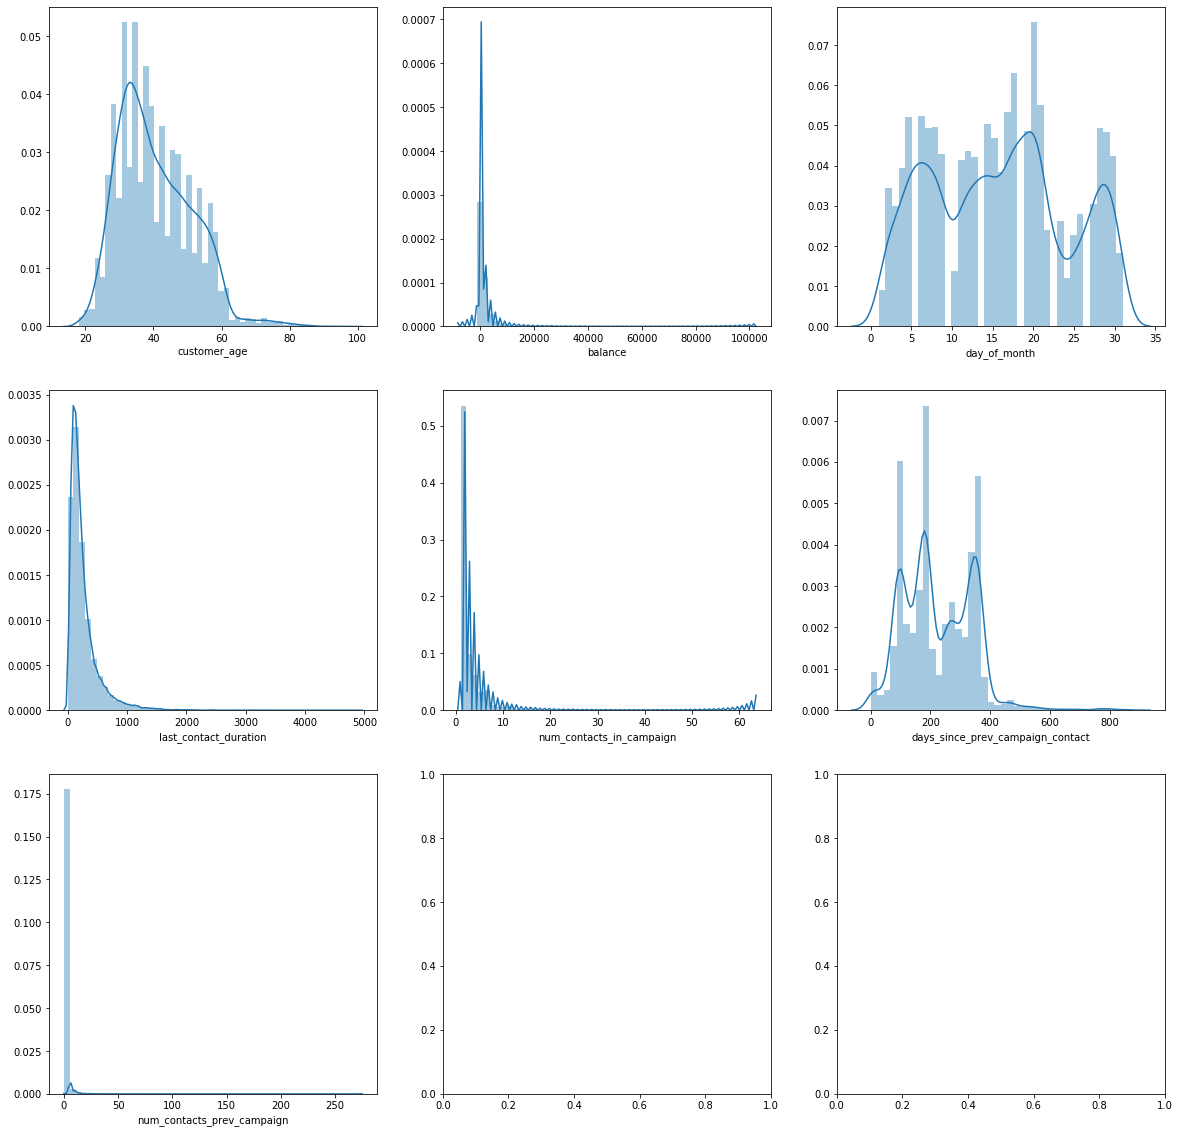

In [16]:
f, ax = plt.subplots(3, 3, figsize = (20,20))
axx = ax.flatten()

for index,col in enumerate(num_cols):
    sns.distplot(train[col], ax = axx[index])

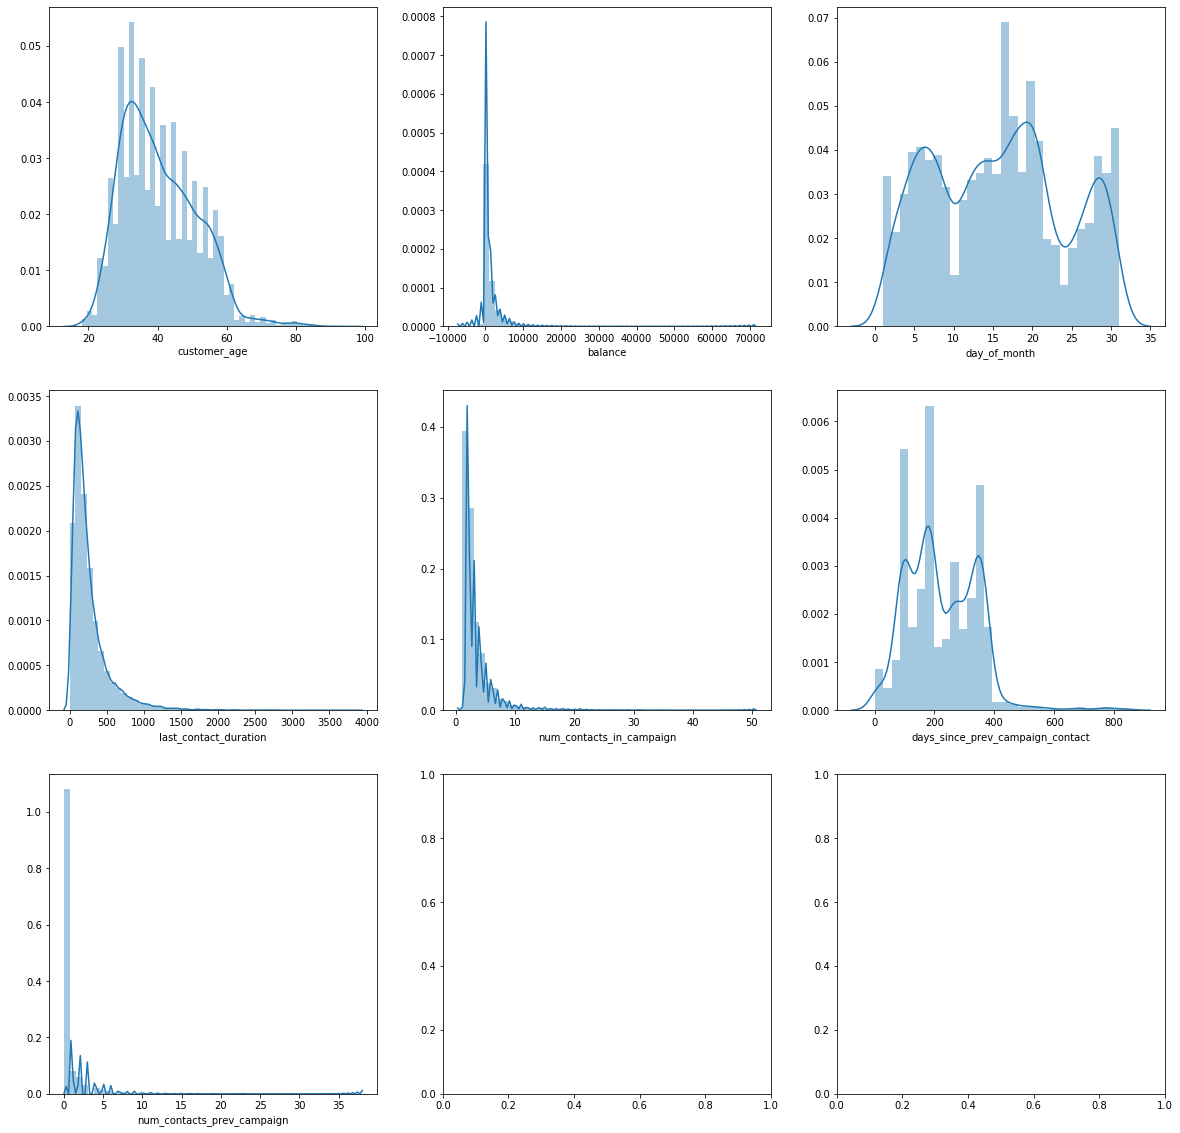

In [17]:
f, ax = plt.subplots(3, 3, figsize = (20,20))
axx = ax.flatten()

for index,col in enumerate(num_cols):
    sns.distplot(test[col], ax = axx[index])

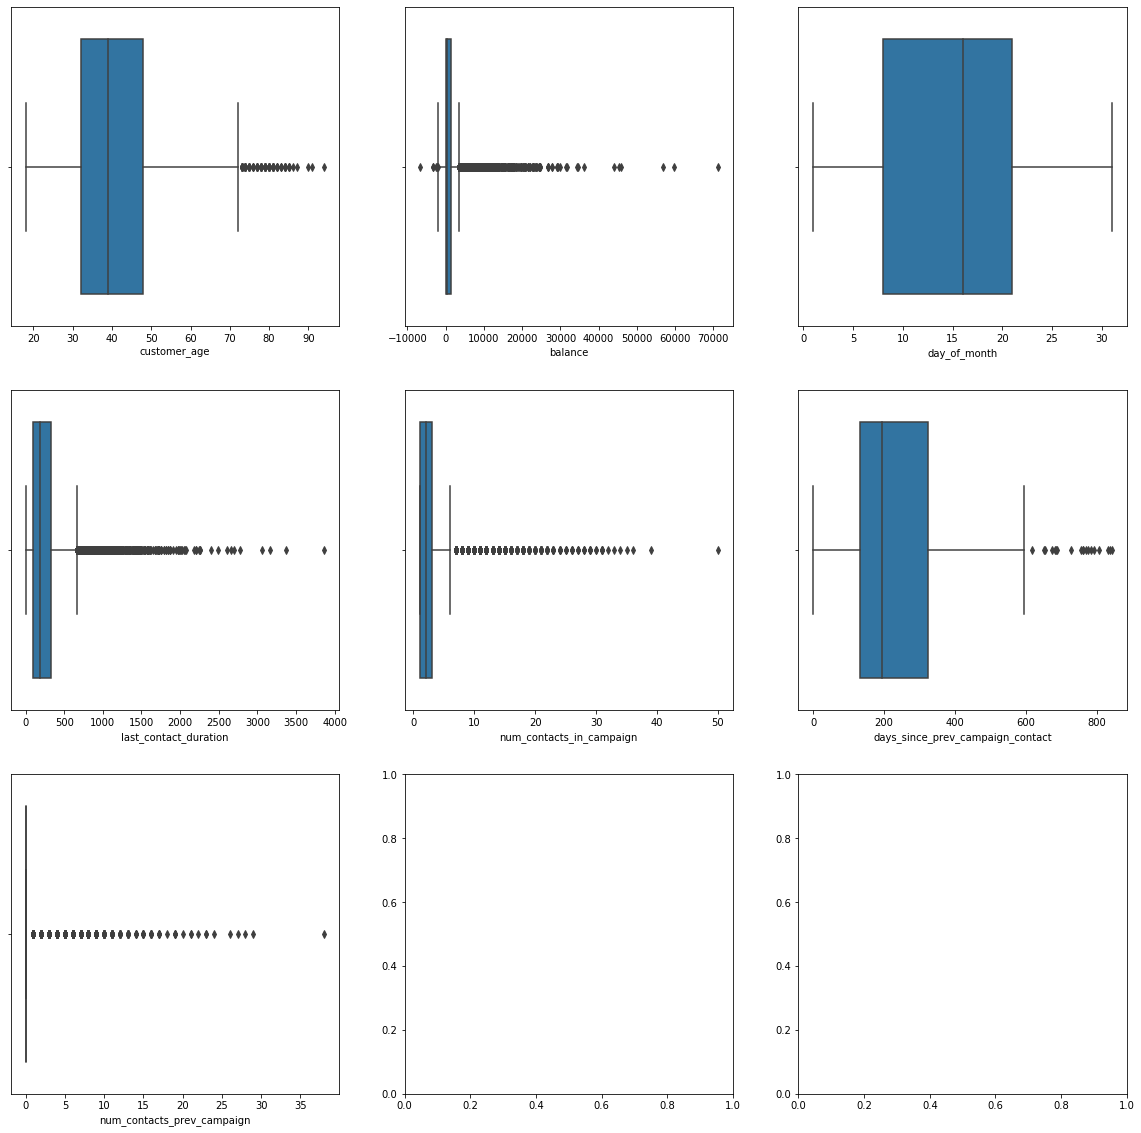

In [18]:
f, ax = plt.subplots(3, 3, figsize = (20,20))
axx = ax.flatten()

for index,col in enumerate(num_cols):
    sns.boxplot(test[col], ax = axx[index])

# Bivariate Analysis(categorical) with target

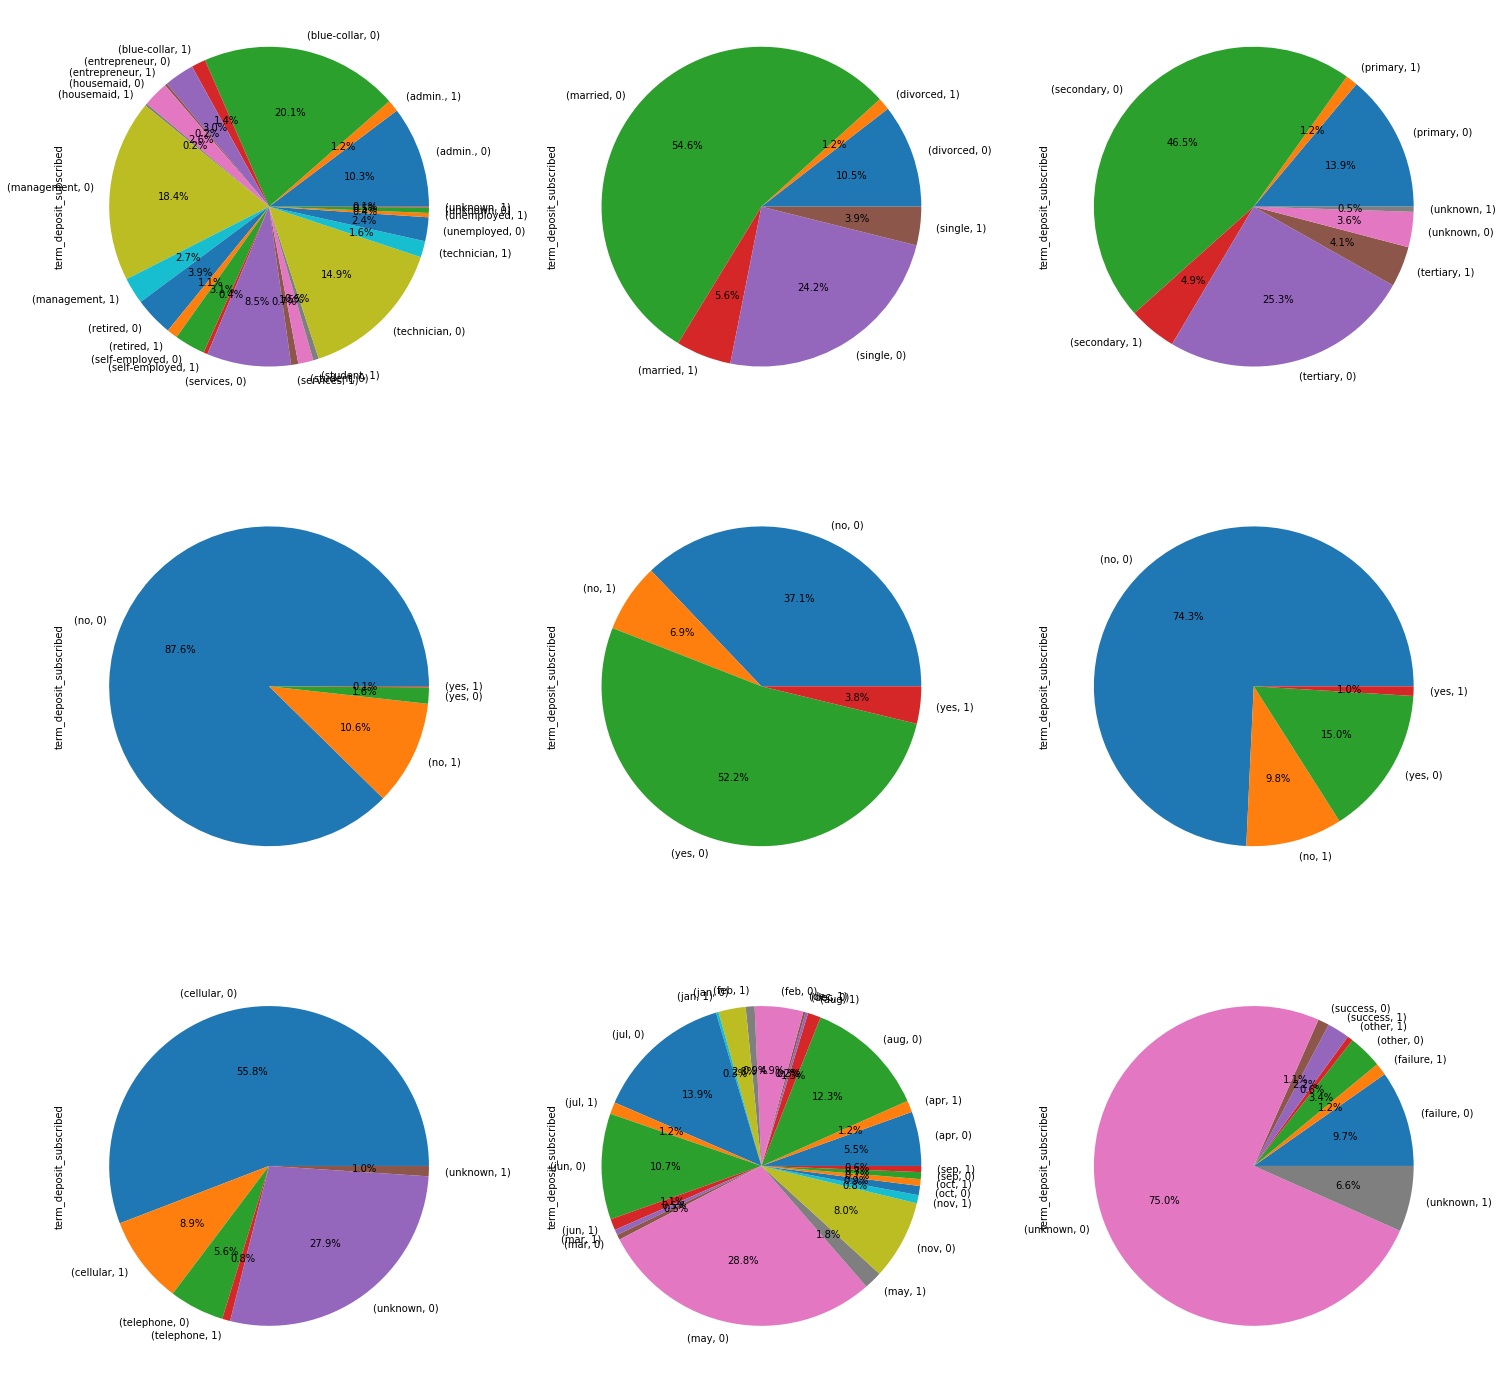

In [19]:
f, ax = plt.subplots(3,3, figsize = (25,25))
axx = ax.flatten()

for index, col in enumerate(cat_cols):
    train.groupby(col)[target].value_counts().plot.pie(autopct = '%1.1f%%', ax = axx[index])

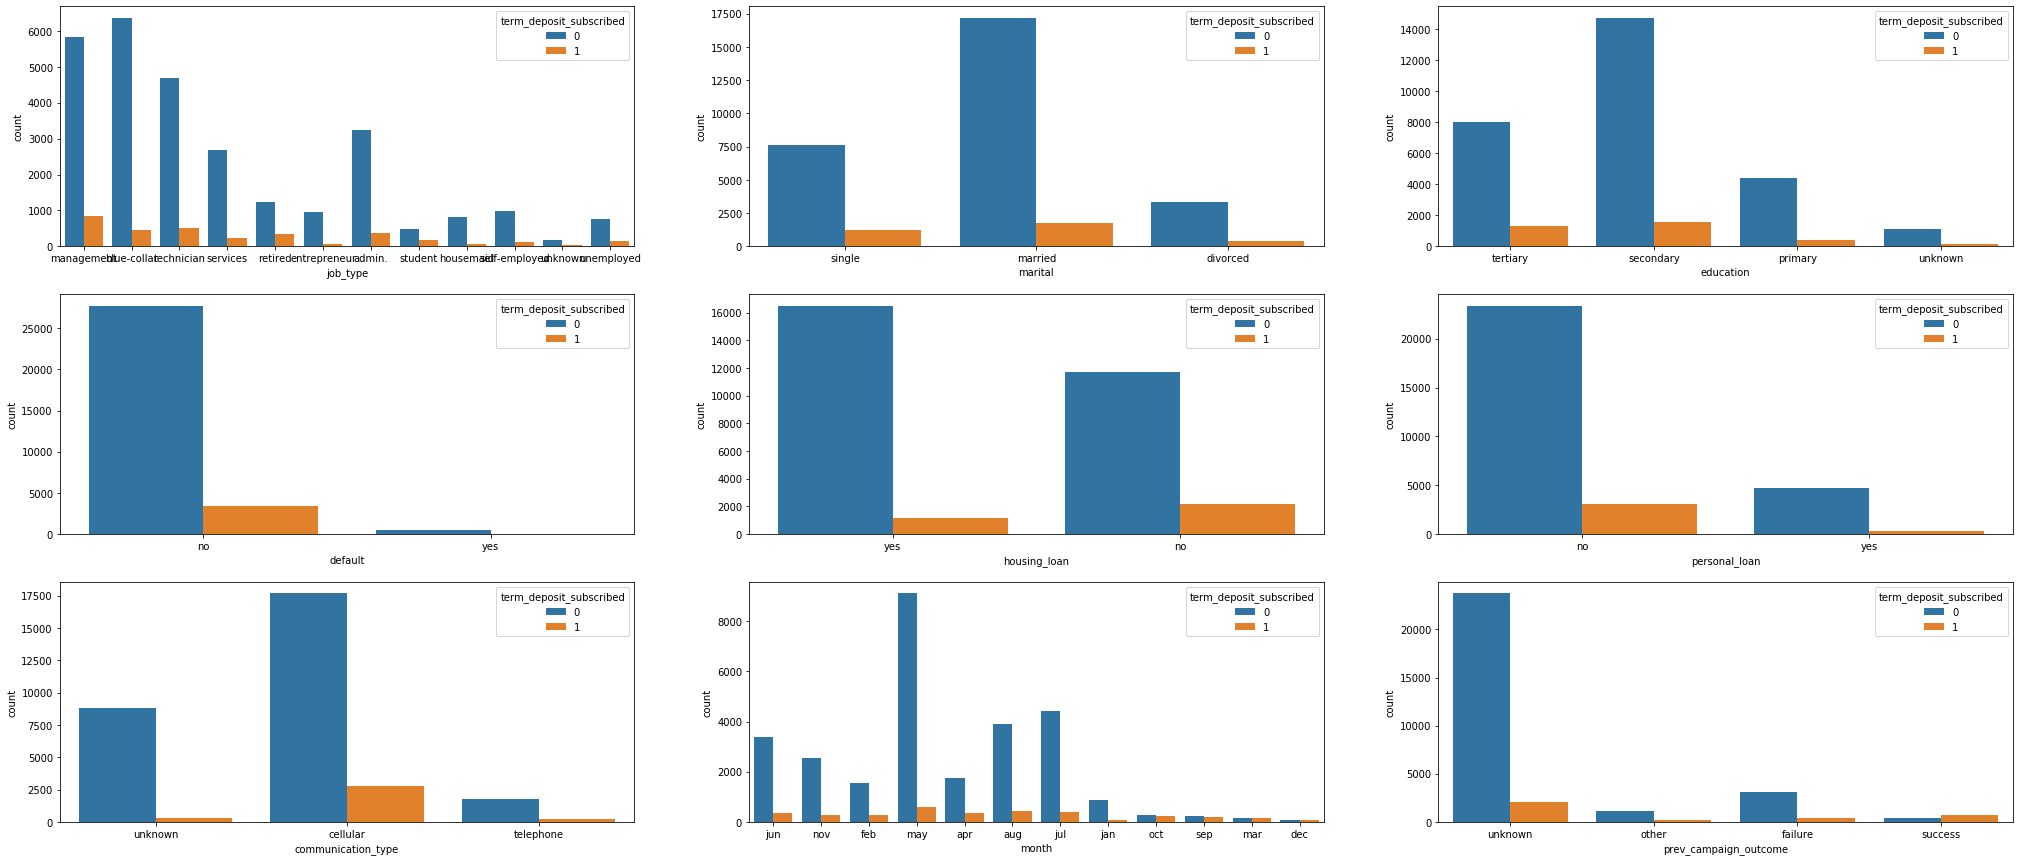

In [20]:
f, ax = plt.subplots(3,3, figsize = (35,15))
axx = ax.flatten()

for index, col in enumerate(cat_cols):
    sns.countplot(train[col],ax = axx[index], hue = train[target])

# Insights
1. Customers contacted in the months of oct,sep,mar,dec have high balance and therefore they are more likely to subscribe. 

**2. Customers who have subscribed in the previous campaign are more likely to do so in this campaign as well**.
3. Customers who have tertiary level of education are more likely to subscribe than primary and secondary level of customers.
4. Customers with no housing loan have a higher chance of subscribing.
5. Customers who are single are more likely to subscribe than those who are married and divorced.
6. Students and retired customers are more likely to subscribe.

# Bivariate Analysis(numerical) with target.

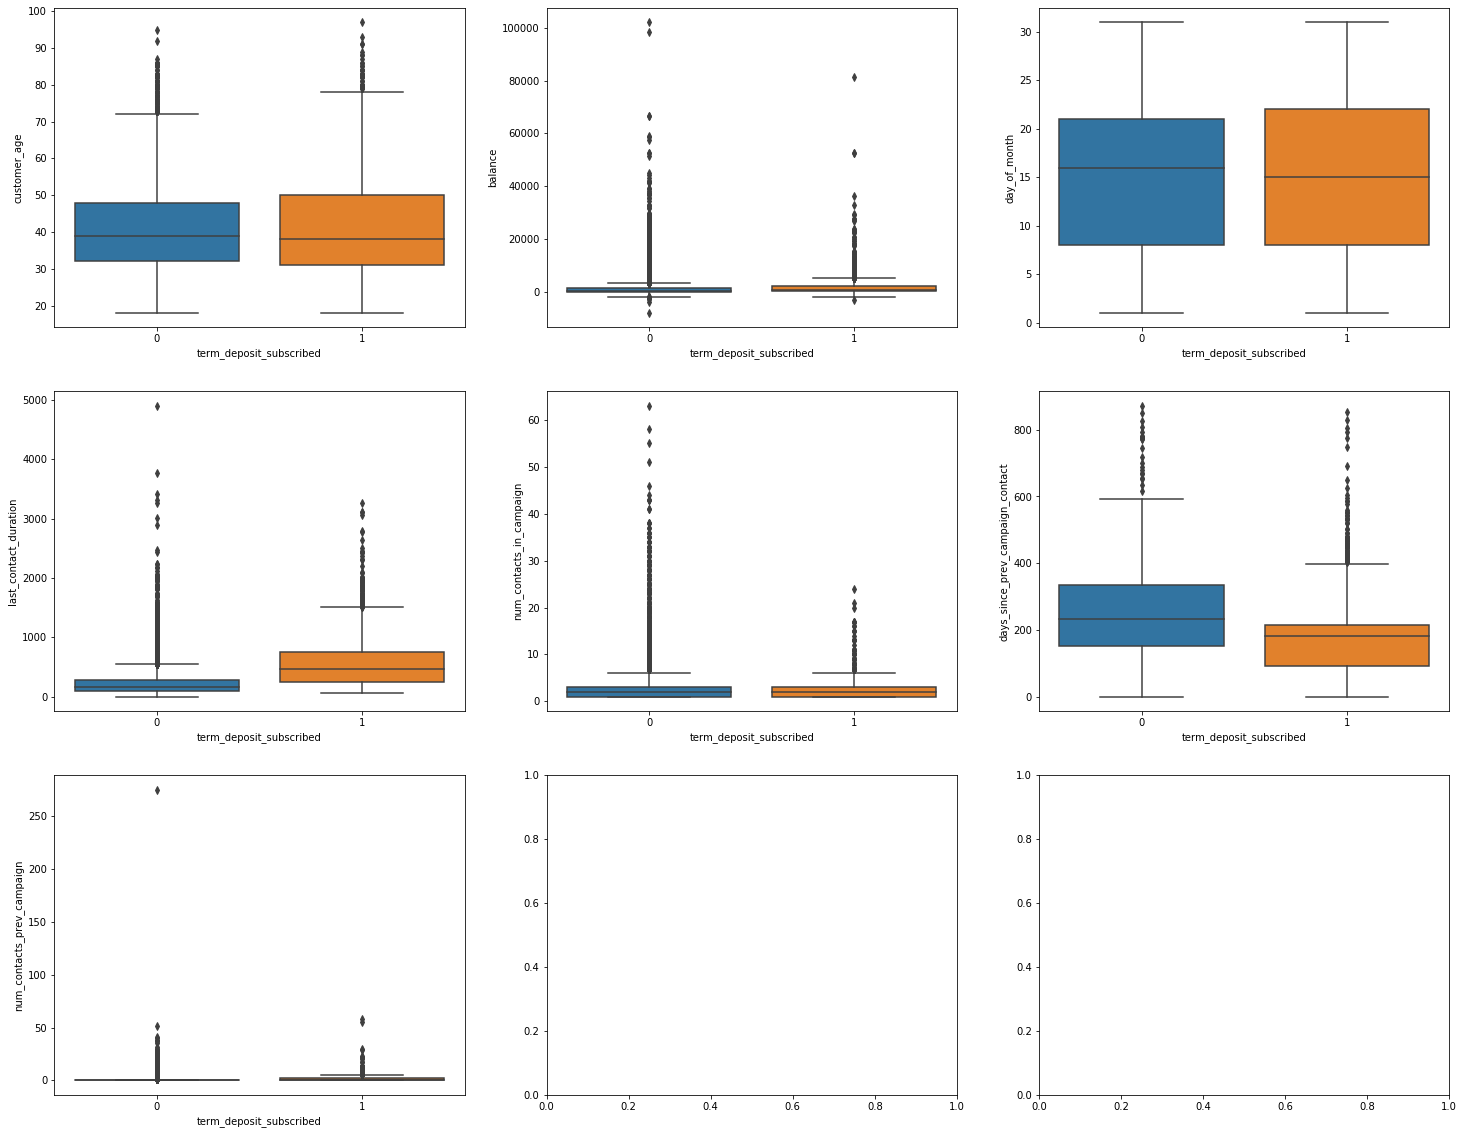

In [21]:
f, ax = plt.subplots(3,3, figsize = (25,20))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.boxplot(x = train[target], y = train[col], ax = axx[index])

# Insights
1. Customers contacted after 400 days of the previous contact has less chance of subscribing.
2. Customers whose last contact duration is greater than 500 seconds has more chance of subscribing.

# Hypothesis Testing

1. 'Single' customers have a higher chance of subscription.
   Yes
2. Customers having tertiary education have a higher chance of subscription.
   Yes
3. Defaulters have a less chance of subscribing.
   Not sure
4. Customers with high balance have a high chance of subscription.
    Yes
5. Customers having any loan will not subcscribe.
   For housing loan 
6. Customers who are contacted at the start or end of the month are most likely to subscribe.
7. Customers with higher last contact duration are most likely to subscribe.
   Yes
8. Old customers will most likely subscribe(subscribed previously).
   Yes

In [22]:
train.groupby('term_deposit_subscribed')['balance'].median()

term_deposit_subscribed
0    418.0
1    763.0
Name: balance, dtype: float64

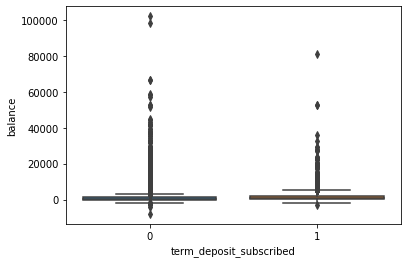

In [23]:
sns.boxplot(x = train['term_deposit_subscribed'], y = train['balance'])

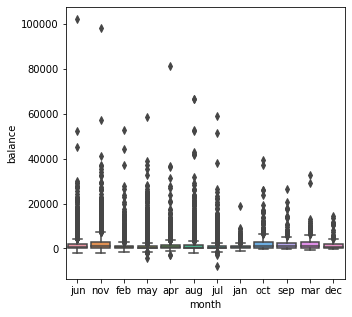

In [24]:
plt.figure(figsize=(5, 5))
sns.boxplot(x = train['month'], y = train['balance'])

<Figure size 1800x1800 with 0 Axes>

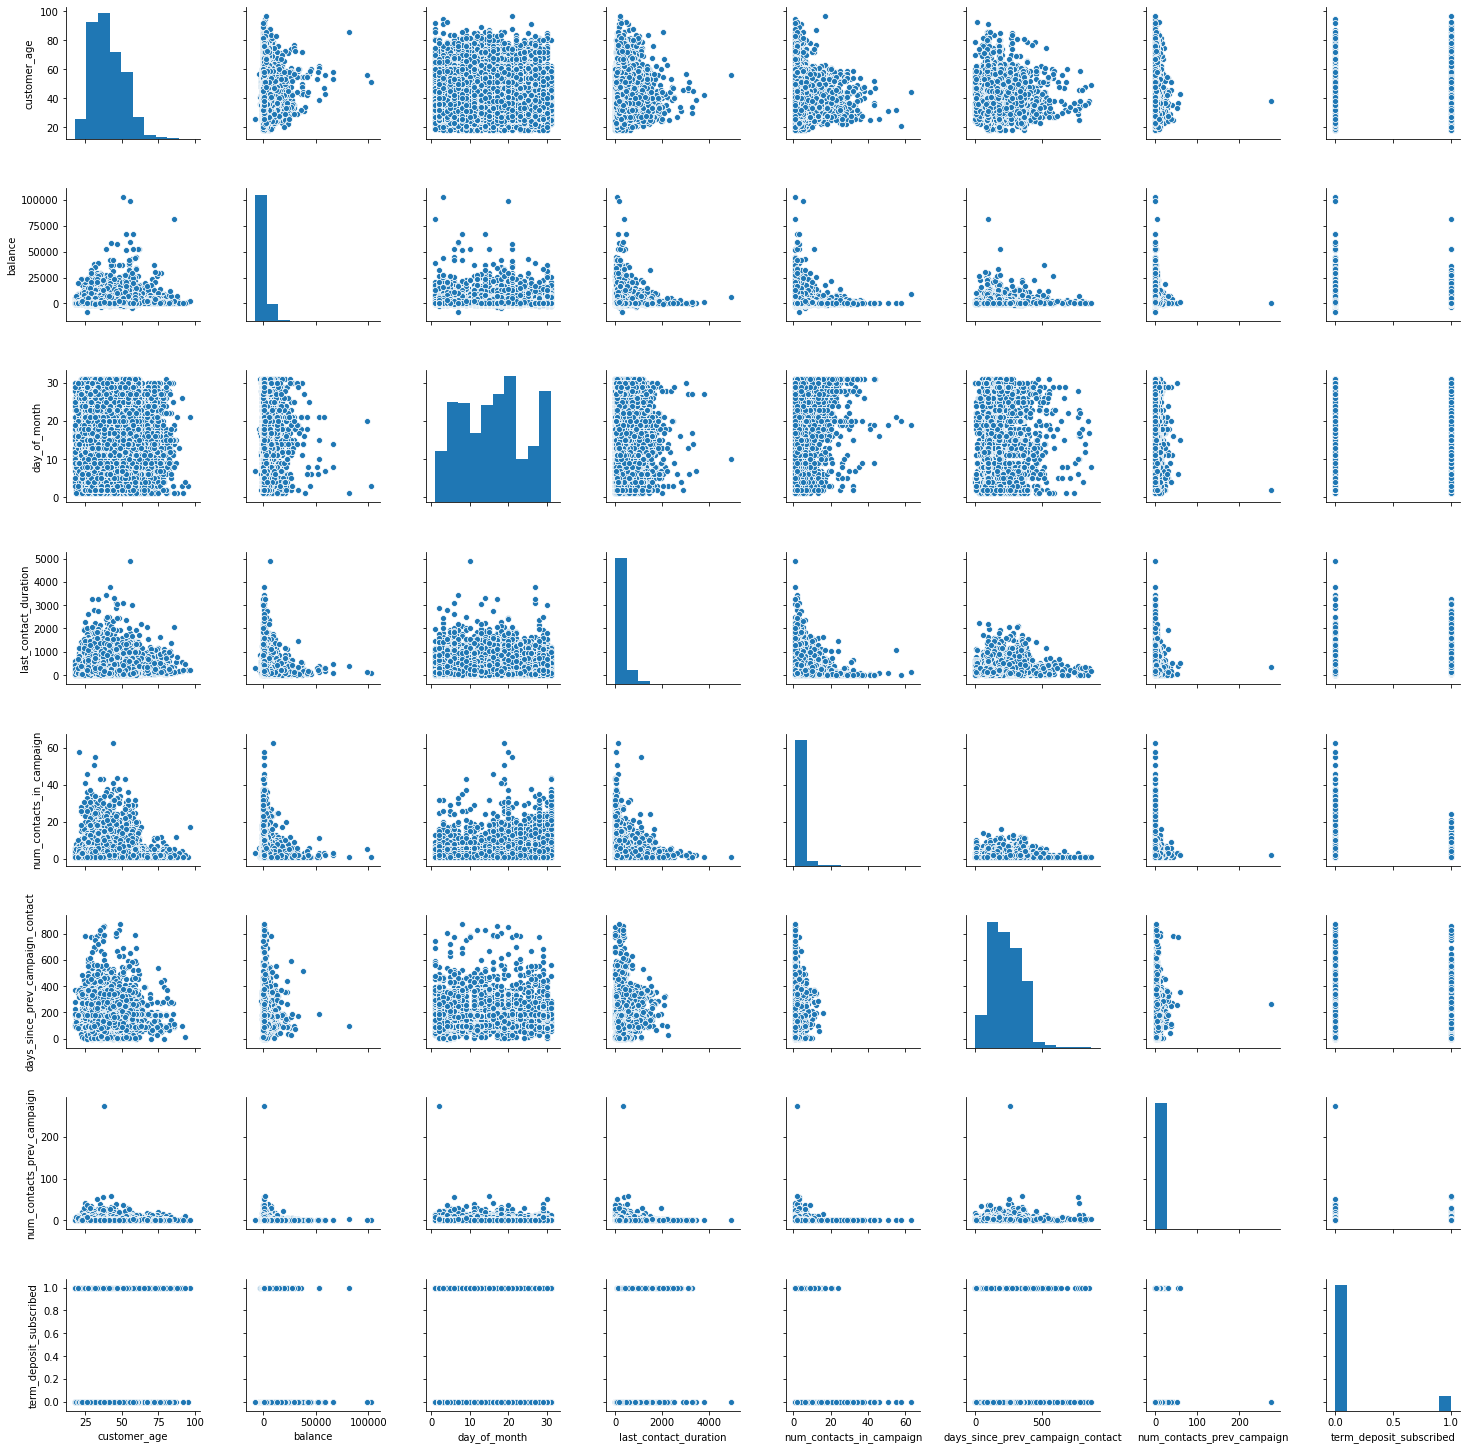

In [25]:
plt.figure(figsize = (25,25))
sns.pairplot(train)

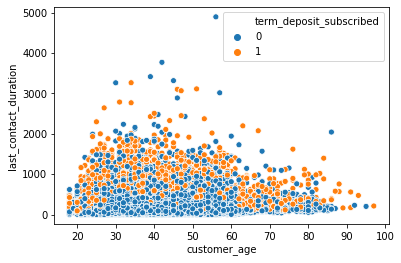

In [26]:
sns.scatterplot(train['customer_age'], train['last_contact_duration'], hue = train['term_deposit_subscribed'])

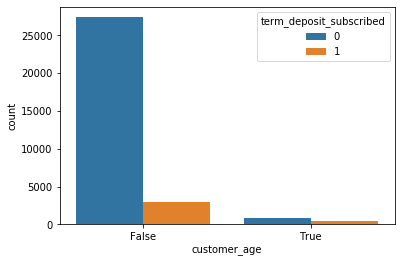

In [27]:
sns.countplot(train['customer_age'] >= 60, hue = train['term_deposit_subscribed'])

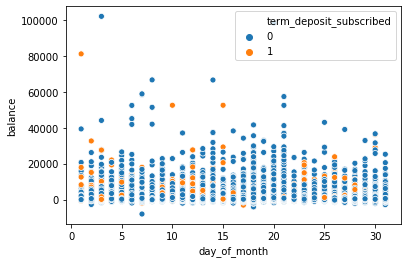

In [28]:
sns.scatterplot(train['day_of_month'], train['balance'], hue = train['term_deposit_subscribed'])

# Insights

1. Customer of age greater than or equal 60 years will subscribe more as compared to younger customers.

# Rule Based Model

In [29]:
def rule_based(data):
    if data['education'] == 'tertiary':
        if data['housing_loan'] == 'no':
            return 1
    return 0

In [30]:
test['predictions'] = test.apply(lambda x : rule_based(x), axis = 1)

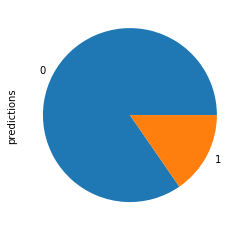

In [31]:
test['predictions'].value_counts().plot.pie()

In [32]:
sample['term_deposit_subscribed'] = test['predictions']

In [33]:
sample.to_csv(r"D:\Data Science\term deposit subscription\rule_based.csv",index = False)

# Features ideas
1. High balance months

#Correlation

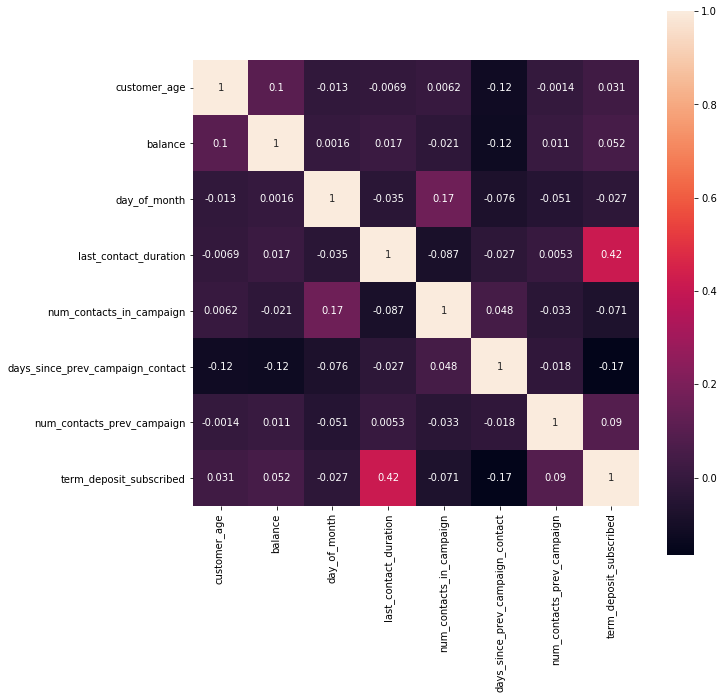

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, square=True)